# Lab 2 — advection-diffusion equation

Tomasz Ogiołda


## Advection-diffusion

### Problem statement

How to describe the concentration $c(x,t)$ of a substance over space $x$ and time $t$? 

### Intro

The advection-diffusion model is a partial differential equation used to describe the transport of a scalar quantity, such as heat, mass, or pollutants, in a fluid. It captures two key physical processes:

- **Advection**: transport due to bulk fluid motion.

- **Diffusion**: spreading due to random molecular motion or turbulence.

### Analytical solution

Analytical solution exists for very simple cases defined by initial and boundary conditions. In most of the cases the numerical solution is required.

In this example we'll perform 1D simulation for substance concentration at fixed position over changing time $t$.

$c(x,t) = \frac{M}{A} \cdot \frac{1}{\sqrt{4\pi D}} \cdot \exp{[-\frac{(vt - x)^2}{4Dt}]}$

Where:

- $\frac{M}{A}$
  - $M$, is a total mass of the substance ($kg$), representing the amount initially present,
  - $A$, is the cross-sectional area ($m^2$), normalizing the mass over the area of diffusion/advection. Together, this term scales the concentration.
- $\frac{1}{\sqrt{4\pi D}}$
  - $D$, is the diffusion coefficient ($m^2/s$), measuring how fast the substance spreads due to diffusion.
  - $\sqrt{4\pi D}$ term arises from the Gaussian solution to the diffusion equation, adjusting the amplitude based on $D$. The square root reflects the spreading over time.
- $\exp{[-\frac{(vt - x)^2}{4Dt}]}$ 
  - $v$ is the advection velocity ($m/s$), the speed at which the substance is carried along (by the wind). 
  - $vt−x$ is the distance between the advected position, $(vt)$ and the observation point ($x$), showing the peak moves with velocity $v$.
  - The $4Dt$ denominator involving diffusion coefficient and time, controlling the width of the spread (larger $D$ or $t$ widens the distribution). 
  - The exponential describes a bell-shaped (Gaussian) profile centered at $x=vt$, modified by diffusion.


In [141]:
%config InlineBackend.figure_formats = ['svg']

import pint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [142]:
si = pint.UnitRegistry()
si.setup_matplotlib()

#### Parameters 

In [143]:
simulation_time = 200

M = 0.5 * si.kilograms
A = 0.2 * si.meter**2
D = 0.15 * si.meter**2 / si.second
v = 0.3 * si.meter / si.second
area = 20


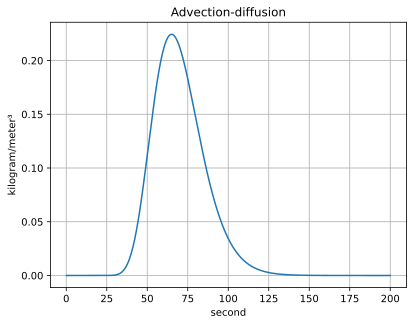

In [144]:
def adv_diff(x, t):
    if not isinstance(x, si.Quantity):
        x = x * si.meter
        
    if not isinstance(t, si.Quantity):
        t = t * si.sec
    
    prefactor = (M / (A * np.sqrt(4 * np.pi * D * t)))
    exponent = -((v * t - x)**2 / (4 * D * t)).to_base_units().magnitude
    
    return prefactor * np.exp(exponent)

t = np.linspace(np.zeros_like(1), simulation_time, 1000) * si.sec # Time domain
c_t = adv_diff(area, t)

plt.plot(t, c_t)
plt.title('Advection-diffusion')
plt.grid(True)
plt.show()